# ROC CURVE KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('G:\\Users\HP\Downloads\Crop_Recommend.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
cat_col=['label',]
le=LabelEncoder()
for i in cat_col:
    le.fit(list(df[i].unique()))
    df[i]=le.transform(df[i])
x=df.iloc[:,0:11].values
y=df['label'].values

In [4]:
# Binarize the output
y = label_binarize(y, classes=df['label'].unique())
n_classes = y.shape[1]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 10))
knn.fit(x_train,y_train)
  

OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=10))

In [7]:
y_scores = knn.predict_proba(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [8]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

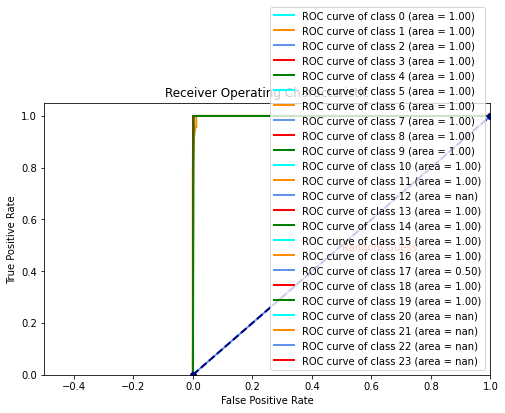

In [9]:
plt.figure(figsize=(8,5))
lw = 2
'''for i in range(n_classes):

    plt.plot(
        fpr[i],tpr[i],color="darkorange",lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc[i],
   )'''
    
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle='dashed',marker='o')

plt.xlim([-.5, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

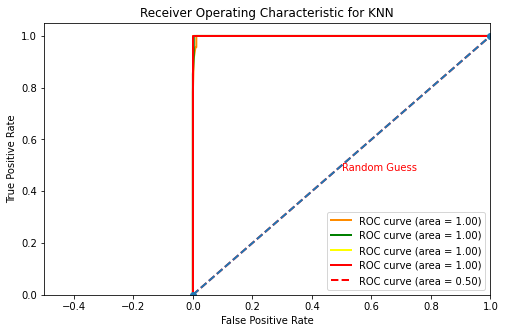

In [11]:
plt.figure(figsize=(8,5))
lw = 2
plt.plot(fpr[1],tpr[1],color="darkorange",lw=lw,
  label="ROC curve (area = %0.2f)" % roc_auc[1],)
plt.plot(fpr[6],tpr[6],color="green",lw=lw,
  label="ROC curve (area = %0.2f)" % roc_auc[6],)
plt.plot(fpr[18],tpr[18],color="yellow",lw=lw,
  label="ROC curve (area = %0.2f)" % roc_auc[18],)
plt.plot(fpr[4],tpr[4],color="red",lw=lw,
  label="ROC curve (area = %0.2f)" % roc_auc[4],)
plt.plot(fpr[17],tpr[17],color="red",lw=lw,
  label="ROC curve (area = %0.2f)" % roc_auc[17],linestyle='--',)
plt.plot([0, 1], [0, 1], lw=2, linestyle='dashed',marker='o')

plt.xlim([-.5, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()